# Power Analysis

Power is used to report confidence in the conclusions drawn from the results of an experiment. It can also be used for estimating the sample size required for the experiment, i.e., a sample size in which — with a given level of confidence — we should be able to detect an effect. By effect one can understand many things, for instance, more frequent conversion within a group, but also higher average spend of customers going through a certain signup flow in an online shop etc.

## Statistical Hypothesis Testing
For example, the null hypothesis for the Pearson’s correlation test is that there is no relationship between two variables. The null hypothesis for the Student’s t test is that there is no difference between the means of two populations. The test is often interpreted using a $p$-value, which is the probability of observing the result given that the null hypothesis is true, not the reverse, as is often the case with misinterpretations.



## Keys concepts to grasp before performing power analysis
Significance Level, Type 1/2 errors and effect size

**<span style = 'color:red'>Significance Level</span>** <br>
A metric closely related to the significance level is the $p$-value, which is the probability of obtaining a result at least as extreme (a result even further from the null hypothesis), provided that the H0 was true. What does that mean in practice? In case of drawing a random sample from a population, it is always possible that the observed effect would have occurred only due to sampling error. The result of an experiment (or for example a linear regression coefficient) is statistically significant when the associated $p$-value is smaller than the chosen alpha

**<span style = 'color:red'>Type 1 Error (False positive, $a$)</span>**<br>
When we reject a true $H_0$ we are talking about a Type I error (false positive). This is the error connected to the significance level. Reject the null hypothesis when there is in fact no significant effect (false positive). The p-value is optimistically small.

**<span style = 'color:red'>Type 2 Error (False negative, $b$)</span>**<br>
when we fail to reject a false $H_0$

**<span style = 'color:red'>Effect size</span>**<br>
Is a quantified magnitude of a phenomenon present in the population. Effect size can be calculated using different metrics depending on the context, for example Pearson's correlation, Regression coefficient & Difference in means btw 2 groups ie Cohen's d


## Statistical Power
**Statistical power** of a hypothesis test is simply the probability that the given test correctly rejects the null hypothesis , when the alternative is in fact true. Higher statistical power of an experiment means lower probability of committing a Type II error. Statistical power is the probability of a hypothesis test of finding an effect if there is an effect to be found.

> statistical power is the probability that a test will correctly reject a false null hypothesis. Statistical power has relevance only when the null is false.

   * **Low Statistical Power**: Large risk of committing Type II errors, e.g. a false negative.
   * **High Statistical Power**: Small risk of committing Type II errors.

> The probability of accepting the alternative hypothesis if it is true

**Power** = Pr(reject $H_0$ | $H_1$ is true) = 1- Pr(fail to reject $H_0$|$H_0$ is false)

Only results with an acceptable level of power should be taken into consideration. It is quite common to design experiments with power level of 80%, which translates to a 20% probability of committing a Type II error.

> Power analysis answers questions like “how much statistical power does my study have?” and “how big a sample size do I need?”.

### How to perform power analysis
   * when we are designing an experiment, we can assume what level of significance, power and effect size is acceptable to us and — as a result — estimate how big a sample we need to gather for such an experiment to yield valid results
   
   * when we are validating an experiment, we can see if, given the used sample size, effect size and significance level, the probability of committing a Type II error is acceptable from the business perspective.
   
[towards data science](https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26)
[mastery ML](https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/)


**Lets start simple**

Assuming that we would like to know how big a sample we need to collect for our experiment, if we accept power at the level of 80%, significance level of 5% and the expected effect size is 0.8

In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

For a given experiment with these defaults, we may be interested in estimating a suitable sample size. That is, how many observations are required from each sample in order to at least detect an effect of 0.80 with an 80% chance of detecting the effect if it is true (20% of a Type II error) and a 5% chance of detecting an effect if there is no such effect (Type I error).

In [2]:
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
                          power = power,
                          alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


**How does power change if i modify the rest of the building blocks?**

Begin the analysis by inspecting how does the sample size influence the power (while keeping the significance level and the effect size at certain levels). I have chosen [0.2, 0.5, 0.8] as the considered effect size values, as these corresponds to the thresholds for small/medium/large, as defined in case of Cohen’s d

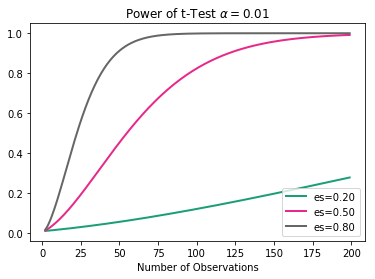

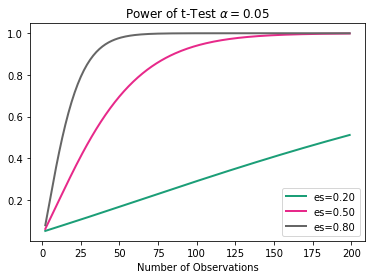

In [16]:

fig = TTestIndPower().plot_power(dep_var='nobs',
                           nobs = np.arange(2,200),
                           effect_size = np.array([0.2,0.5,0.8]),
                           alpha = 0.01,
                           title = 'Power of t-Test ' + r'$\alpha = 0.01$')

fig = TTestIndPower().plot_power(dep_var='nobs',
                           nobs = np.arange(2,200),
                           effect_size = np.array([0.2,0.5,0.8]),
                           alpha = 0.05,
                           title = 'Power of t-Test ' + r'$\alpha = 0.05$')


From the plots we can infer that an increase in the the sample/effect size leads to an increase in power. In other words, the bigger the sample, the higher the power, keeping other parameters constant.

What are the remaining sample/effect size?

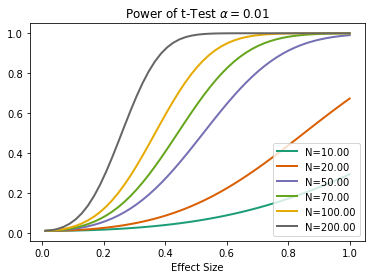

In [18]:
fig = TTestIndPower().plot_power(dep_var='es', #dependent variable
                          nobs = np.array([10,20,50,70,100,200]), #num of observations
                          effect_size=np.linspace(0.01,1,51),
                          alpha=0.01,
                          title = 'Power of t-Test ' + r'$\alpha = 0.01$')

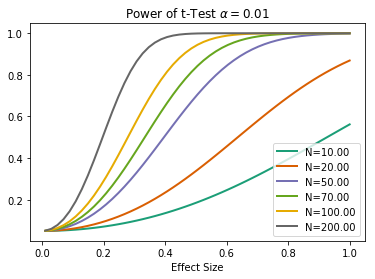

In [19]:
fig = TTestIndPower().plot_power(dep_var='es', #dependent variable
                          nobs = np.array([10,20,50,70,100,200]), #num of observations
                          effect_size=np.linspace(0.01,1,51),
                          alpha=0.05,
                          title = 'Power of t-Test ' + r'$\alpha = 0.01$')